# **01: PyTorch WorkFlow**


In [92]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim


## **1: Data Preparation**

Data can be almost anything in ML.

ML is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in those numerical representation

Let's build some *known* datas for Linear Regression

#### Video 1

In [93]:
## Video 1

weight = 0.7
bias = 0.3

# Create some data
start=0
end=1
step=0.02
X=torch.arange(start=start,end=end,step=step).unsqueeze(dim=1) # unsqueeze to make it a column vector basically adding a dimension to the tensor
y=weight*X+bias
X[0:10],y[0:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Video 2

In [94]:
## Video 2

### Split the data into training and testing, one of the most important concepts in ML
### We want to train the model on the training data and test it on the testing data
### This is to avoid overfitting

n_samples=X.shape[0]
n_train=int(0.8*n_samples)
n_test=n_samples-n_train
X_train=X[0:n_train]
y_train=y[0:n_train]
X_test=X[n_train:]
y_test=y[n_train:]



#### Video 3

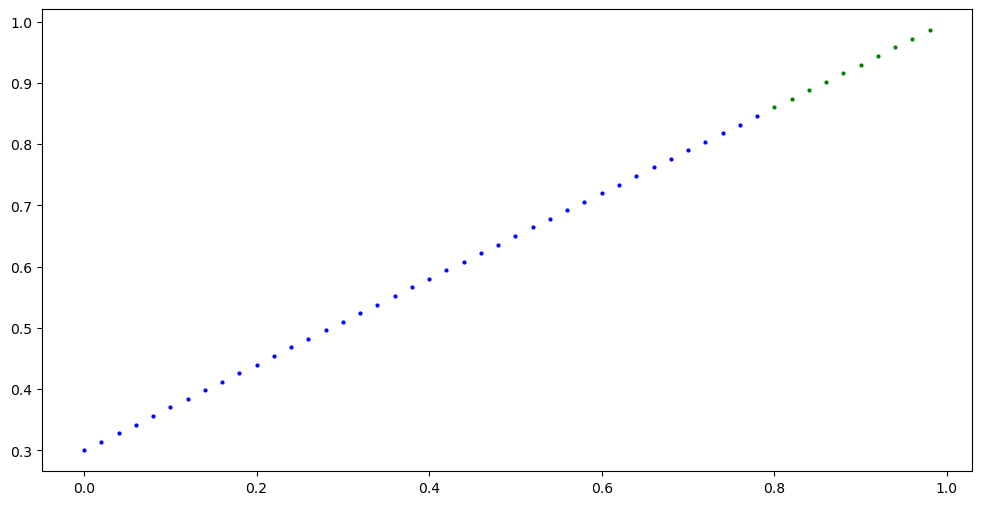

In [95]:
## Video 3

### Visualize the data

def plot_predictions(train_data=X_train, train_labels=y_train, test_datas=X_test, test_labels=y_test, prediction=None):
    """
    Plots the training data, testing data and the prediction of the model
    """
    plt.figure(figsize=(12, 6))
    plt.scatter(train_data, train_labels, c="b", label="Training data",s=4)
    plt.scatter(test_datas, test_labels, c="g", label="Testing data",s=4)
    if prediction is not None:
        plt.scatter(test_datas, prediction, c="r", label="Prediction")
    
    plt.show()
    
plot_predictions()

#### Video 4

## **2: Build The Model**

### Pytorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a NN can be considered a computational graph)

* torch.nn.Parameters - what parameters should our model try and learn, often a PyTorch  layer from torch.nn will set those for us

* torch.nn.Module - the base class for all NN modules, if you subclass it you should overwrite forward()

* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

* def forward() - this method defines what happens when you use the model on an input

In [96]:
## Video 4

### Build the model

### Create a linear regression model class

class LinearRegressionModel(nn.Module): # <- Almost all PyTorch models are subclasses of nn.Module
    def __init__(self):
        super(LinearRegressionModel,self).__init__()
        self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    
    
    def forward(self,X:torch.Tensor)->torch.Tensor: # <- This is the forward pass of the model
        return self.weight*X+self.bias
    

#### Video 5

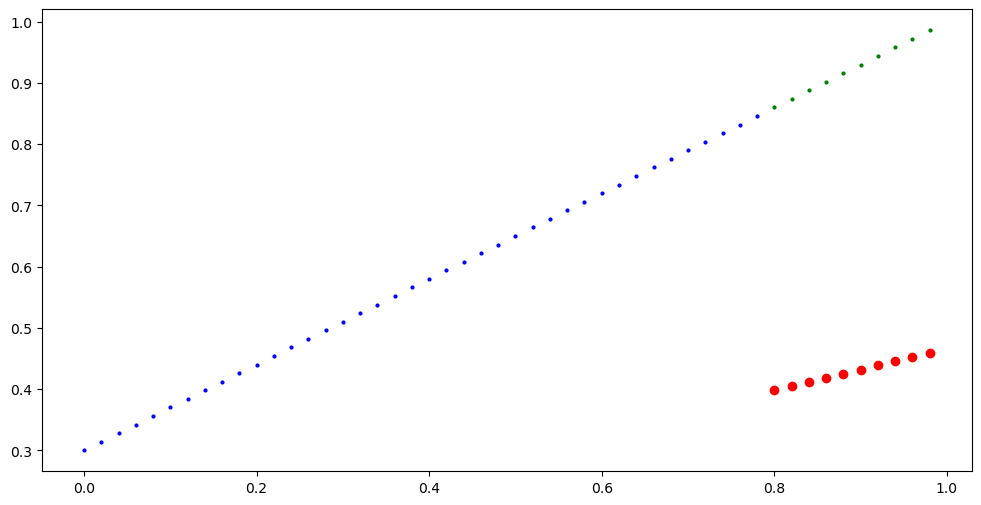

In [97]:
## Video 5

### Check out the model

torch.manual_seed(42)

### Create the model

model_0=LinearRegressionModel()


### Let's check how weel our model is doing on the test data
with torch.inference_mode():
    y_pred=model_0(X_test)

plot_predictions(train_data=X_train, train_labels=y_train, test_datas=X_test, test_labels=y_test, prediction=y_pred.detach().numpy())

### Not good at all, we need to train the model


#### Video 6

In [98]:
## Video 6

### Train the model

### Define the loss function
loss_fn=nn.L1Loss() # <- Mean Absolute Error Loss

### Define the optimizer
optimizer=optim.Adam(model_0.parameters(),lr=0.001) # <- Stochastic Gradient Descent optimizer


## **3: Training**

### Build a training loop (and a testing loop) in PyTorch

A couple of things we need on a training loop:

0. Loop through the data
1. Forward Pass, involves data moving through our model's *forward* function(s)
2. Calculate the loss (compare forward pass with actual outputs)
3. Optimizer zero grad
4. Loss backwards through the network to calculate the gradients of each of parameter of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model parameters to try and imporve the loss


In [99]:
# An epoch is one complete pass through the entire training data
epochs=100001
lr=0.001
#0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() ## Sets all the layers to training mode, this is important because some layers behave differently in training and testing mode
    #1. Forward Pass
    y_pred=model_0(X_train)
    #2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
    #3. Zero the gradients
    optimizer.zero_grad()
    if epoch%10000==0:
        print(f"Epoch {epoch}: Loss: {loss.item()}, Weight: {model_0.weight.item()}, Bias: {model_0.bias.item()}, lr: {optimizer.param_groups[0]['lr']}")
        optimizer.param_groups[0]['lr']/=3
        
    
    #4. Backward Pass
    loss.backward()
    
    #5. Update the weights
    optimizer.step()
    
    # model_0.eval() # <- Sets the model to evaluation mode
    
    
    


Epoch 0: Loss: 0.31288138031959534, Weight: 0.33669036626815796, Bias: 0.12880940735340118, lr: 0.001
Epoch 10000: Loss: 6.929338269401342e-05, Weight: 0.7000439167022705, Bias: 0.3000521659851074, lr: 0.0003333333333333333
Epoch 20000: Loss: 1.4267116966948379e-05, Weight: 0.6999847888946533, Bias: 0.2999916672706604, lr: 0.0001111111111111111
Epoch 30000: Loss: 2.9332936719583813e-06, Weight: 0.6999942064285278, Bias: 0.29999932646751404, lr: 3.7037037037037037e-05
Epoch 40000: Loss: 1.1771917343139648e-06, Weight: 0.6999996304512024, Bias: 0.2999989688396454, lr: 1.2345679012345678e-05
Epoch 50000: Loss: 1.2092292536181048e-06, Weight: 0.7000007033348083, Bias: 0.300000935792923, lr: 4.115226337448559e-06
Epoch 60000: Loss: 1.3858080194495415e-07, Weight: 0.7000001072883606, Bias: 0.3000001013278961, lr: 1.371742112482853e-06
Epoch 70000: Loss: 0.0, Weight: 0.699999988079071, Bias: 0.30000001192092896, lr: 4.5724737082761767e-07
Epoch 80000: Loss: 0.0, Weight: 0.699999988079071, Bia

## **4: Making Predictions**

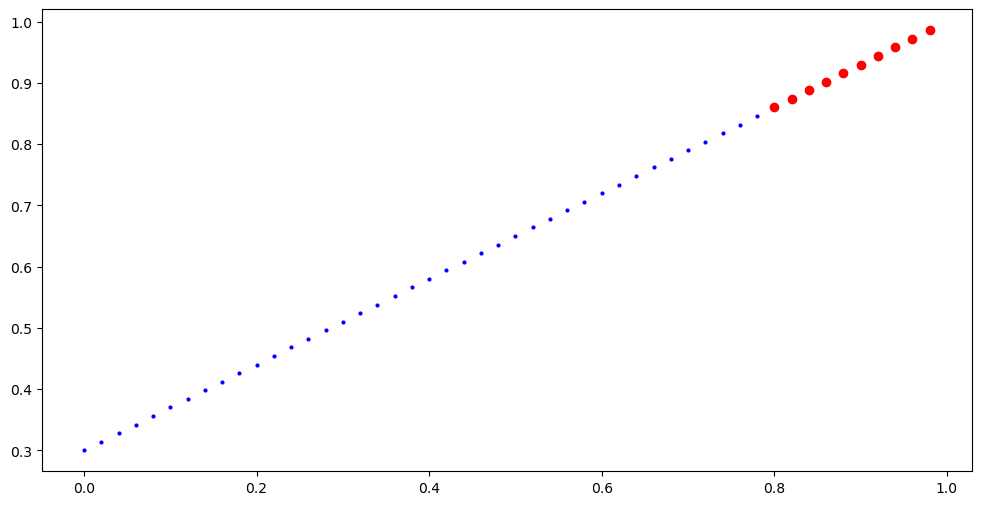

In [100]:
with torch.inference_mode():
    y_pred=model_0(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_datas=X_test, test_labels=y_test, prediction=y_pred.detach().numpy())

## **5: Saving And Loading The Model**

### **Saving a model in PyTorch**

There are 3 main methods for sving and loading a model:
1. torch.save() - allows you to save a PyTorch object in Python's pikle format
2. torch.load() - allows you to load a saved pytorch object
3. torch.nn.Module.load_state_dict() - this allows to load a models's saved state dictionary

In [101]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="model_0_linear_regression_model_state_dict.pth"

MODEL_NAME2="model_0_linear_regression_model.pth"

MODEL_PATH=MODEL_PATH/MODEL_NAME

MODEL_PATH2=MODEL_PATH.parent/MODEL_NAME2

MODEL_PATH,MODEL_PATH2

torch.save(model_0.state_dict(),MODEL_PATH)
torch.save(model_0,MODEL_PATH2)


### **Load back in the model**

In [102]:
## First model
model_0_1=LinearRegressionModel()
model_0_1.load_state_dict(torch.load(MODEL_PATH))
model_0_1.eval()


## Second model
model_0_2=torch.load(MODEL_PATH2)
model_0_2.eval()

y_pred1=model_0_1(X_test)
y_pred2=model_0_2(X_test)



## **6: Putting it all together**